<a href="https://colab.research.google.com/github/ClauRozasG/Arbol-decision-autos/blob/main/%C3%81rbol_de_decision_autos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
uri='https://gist.githubusercontent.com/ahcamachod/1595316a6b37bf39baac355b081d9c3b/raw/98bc94de744764cef0e67922ddfac2a226ad6a6f/car_prices.csv'

In [2]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [3]:
import pandas as pd
import numpy as np
df=pd.read_csv(uri)
df.head()

,Unnamed: 0,mileage_per_year,model_year,price,sold
0,0,21801,2000,30941.02,yes
1,1,7843,1998,40557.96,yes
2,2,7109,2006,89627.50,no
3,3,26823,2015,95276.14,no
4,4,7935,2014,117384.68,yes


In [4]:
print(df.columns)

Index(['Unnamed: 0', 'mileage_per_year', 'model_year', 'price', 'sold'], dtype='object')


In [5]:
new_columns={'mileage_per_year':'millas_por_anio', 'model_year':'anio_modelo', 'price':'precio', 'sold':'vendido'}

df=df.rename(columns=new_columns)
df.head()

,Unnamed: 0,millas_por_anio,anio_modelo,precio,vendido
0,0,21801,2000,30941.02,yes
1,1,7843,1998,40557.96,yes
2,2,7109,2006,89627.50,no
3,3,26823,2015,95276.14,no
4,4,7935,2014,117384.68,yes


In [6]:
cambio={'no':0, 'yes':1}
df.vendido=df.vendido.map(cambio)
df

,Unnamed: 0,millas_por_anio,anio_modelo,precio,vendido
0,0,21801,2000,30941.02,1
1,1,7843,1998,40557.96,1
2,2,7109,2006,89627.50,0
3,3,26823,2015,95276.14,0
4,4,7935,2014,117384.68,1
...,...,...,...,...,...
9995,9995,15572,2006,97112.86,0
9996,9996,13246,2002,107424.63,1
9997,9997,13018,2014,93856.99,0
9998,9998,10464,2011,51250.57,1


In [7]:
from datetime import datetime
anio_actual=datetime.today().year
df['edad_del_modelo'] = anio_actual - df.anio_modelo
df.head()

,Unnamed: 0,millas_por_anio,anio_modelo,precio,vendido,edad_del_modelo
0,0,21801,2000,30941.02,1,23
1,1,7843,1998,40557.96,1,25
2,2,7109,2006,89627.50,0,17
3,3,26823,2015,95276.14,0,8
4,4,7935,2014,117384.68,1,9


In [8]:
datos_km=df.millas_por_anio*1.6
df['km/anio']=datos_km
df.head()

,Unnamed: 0,millas_por_anio,anio_modelo,precio,vendido,edad_del_modelo,km/anio
0,0,21801,2000,30941.02,1,23,34881.6
1,1,7843,1998,40557.96,1,25,12548.8
2,2,7109,2006,89627.50,0,17,11374.4
3,3,26823,2015,95276.14,0,8,42916.8
4,4,7935,2014,117384.68,1,9,12696.0


In [9]:
df=df.drop(columns=['Unnamed: 0', 'millas_por_anio', 'anio_modelo'], axis=1)
df.head()

,precio,vendido,edad_del_modelo,km/anio
0,30941.02,1,23,34881.6
1,40557.96,1,25,12548.8
2,89627.50,0,17,11374.4
3,95276.14,0,8,42916.8
4,117384.68,1,9,12696.0


In [10]:
# Usando StandardScaler()

from sklearn.tree import DecisionTreeClassifier

x= df[['edad_del_modelo','km/anio', 'precio']]
y= df.vendido

SEED = 42
np.random.seed(SEED)

raw_x_train, raw_x_test, y_train, y_test = train_test_split(x,y,test_size=0.25,stratify=y)
print(f"Entrenaremos con {len(raw_x_train)} elementos y probaremos con {len(raw_x_test)} elementos.")

scaler = StandardScaler()
scaler.fit(raw_x_train)
x_train = scaler.transform(raw_x_train)
x_test = scaler.transform(raw_x_test)

model = DecisionTreeClassifier(max_depth=3)
model.fit(x_train,y_train)
previsiones= model.predict(x_test)

tasa_de_acierto = accuracy_score(y_test, previsiones)
print(f'La tasa de acierto fue de: {round(tasa_de_acierto*100,2)}%')

Entrenaremos con 7500 elementos y probaremos con 2500 elementos.
La tasa de acierto fue de: 78.04%


In [11]:
# Sin estandarizar
from sklearn.tree import DecisionTreeClassifier

x= df[['edad_del_modelo','km/anio', 'precio']]
y= df.vendido

SEED = 42
np.random.seed(SEED)

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25,stratify=y)
print(f"Entrenaremos con {len(x_train)} elementos y probaremos con {len(x_test)} elementos.")

model = DecisionTreeClassifier(max_depth=3)
model.fit(x_train,y_train)
previsiones= model.predict(x_test)

tasa_de_acierto = accuracy_score(y_test, previsiones)
print(f'La tasa de acierto fue de: {round(tasa_de_acierto*100,2)}%')

Entrenaremos con 7500 elementos y probaremos con 2500 elementos.
La tasa de acierto fue de: 78.04%


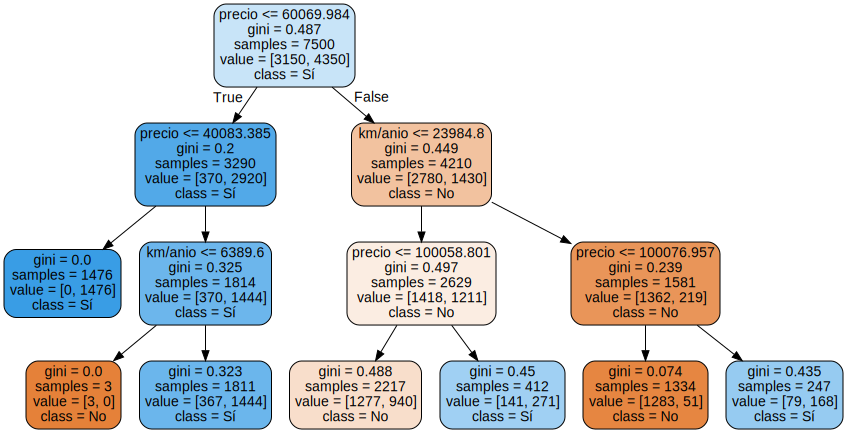

In [12]:
from sklearn.tree import export_graphviz
import graphviz

features = x.columns
dot_data = export_graphviz(model, feature_names=features, filled=True, rounded=True, class_names=['No','Sí'])
grafico = graphviz.Source(dot_data)
grafico